# K Means over Faces
In this notebook, we will attempt to group the faces using our vectorized data. 

In [1]:
# import the necessary packages
from matplotlib import pyplot
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from imutils import build_montages
import helper 
import numpy as np
import argparse
import pickle
import cv2

### File Path and Model Selection

Takes arguments of dataset, indicate data path and model to use

In [2]:


encoded_path = 'encodings.pickle' #path to vectorized faces
cpu_nums = -1 # nunber of cpu to use, uses all cpu if -1 

args = {'encodings': encoded_path, 'jobs': cpu_nums}


### Run K-Means 
Prepare data and runs K=means 

In [3]:
# load the serialized face encodings + bounding box locations from
# disk, then extract the set of encodings to so we can cluster on
# them
print("[INFO] loading encodings...")
data = pickle.loads(open(args["encodings"], "rb").read())
data = np.array(data)
data = np.flip(data)
encodings = [d["encoding"] for d in data]



# cluster the embeddings
print("[INFO] clustering...")
clt = KMeans(n_jobs=args["jobs"])
clt.fit(encodings)

max_clusters = 10
average_distance_to_centroid = []

for i in range(1, max_clusters + 1):
    clt = KMeans(n_clusters=i, max_iter=100)
    clt.fit(encodings)
    average_distance_to_centroid.append(clt.inertia_)
    
print("Done")
    




[INFO] loading encodings...
[INFO] clustering...
Done


Run the below code to see the average distance to each centroid as we increase the centroids 

Text(0, 0.5, 'average distance')

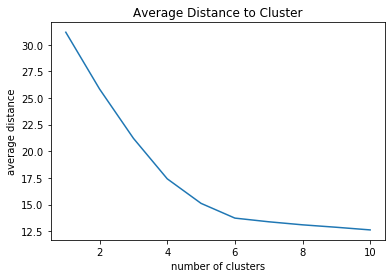

In [4]:
pyplot.plot([x for x in range(1, max_clusters + 1)], average_distance_to_centroid)
pyplot.title('Average Distance to Cluster')
pyplot.xlabel("number of clusters")
pyplot.ylabel("average distance")

    

### Group unique faces


In [5]:

# determine the total number of unique faces found in the dataset
labelIDs = np.unique(clt.labels_)
print("There are {} unique faces".format(len(labelIDs)))
 
# loop over the unique face integers
for labelID in labelIDs:
        print("Faces for face ID: {}".format(labelID))
        idxs = np.where(clt.labels_ == labelID)[0]

        # initialize the list of faces to include in the montage
        faces = []

        # loop over the sampled indexes
        for i in idxs:
            print(data[i]["imagePath"])
            # load the input image and extract the face ROI
        #needs work to display 
            image = cv2.imread(data[i]["imagePath"])
            (top, right, bottom, left) = data[i]["loc"]
            face = image[top:bottom, left:right]


            # force resize the face ROI to 96x96 and then add it to the
            # faces montage list
            face = cv2.resize(face, (96, 96))
            #print(np.shape(face))
            faces.append(face)

        # create a montage using 96x96 "tiles" with 5 rows and 5 columns
        montage = build_montages(faces, (96, 96), (5, 5))[0]

        # show the output montage
        title = "Face ID #{}".format(labelID)
        title = "Unknown Faces" if labelID == -1 else title


There are 10 unique faces
Faces for face ID: 0
../../data/Chp6/Ex2/dataset/00000026.jpg
../../data/Chp6/Ex2/dataset/00000043.jpg
../../data/Chp6/Ex2/dataset/00000047.jpg
Faces for face ID: 1
../../data/Chp6/Ex2/dataset/00000073.jpg
../../data/Chp6/Ex2/dataset/00000074.jpg
../../data/Chp6/Ex2/dataset/00000075.jpg
../../data/Chp6/Ex2/dataset/00000076.jpg
../../data/Chp6/Ex2/dataset/00000077.jpg
../../data/Chp6/Ex2/dataset/00000078.jpg
../../data/Chp6/Ex2/dataset/00000079.jpg
../../data/Chp6/Ex2/dataset/00000080.jpg
../../data/Chp6/Ex2/dataset/00000081.jpg
../../data/Chp6/Ex2/dataset/00000082.jpg
../../data/Chp6/Ex2/dataset/00000083.jpg
../../data/Chp6/Ex2/dataset/00000084.jpg
../../data/Chp6/Ex2/dataset/00000085.jpg
../../data/Chp6/Ex2/dataset/00000086.jpg
../../data/Chp6/Ex2/dataset/00000087.jpg
../../data/Chp6/Ex2/dataset/00000088.jpg
../../data/Chp6/Ex2/dataset/00000089.jpg
../../data/Chp6/Ex2/dataset/00000090.jpg
../../data/Chp6/Ex2/dataset/00000091.jpg
../../data/Chp6/Ex2/dataset/00